In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
# Load polygon data 
file_path = "sedgwick_TREX24.geojson"  
gdf = gpd.read_file(file_path)

# Check current CRS
print("Original CRS:", gdf.crs)

# Convert to California Albers (EPSG:3310) for proper area/perimeter calculations
gdf = gdf.to_crs(epsg=3310)

gdf["centroid"] = gdf.geometry.centroid

# Compute area and perimeter
gdf["area"] = gdf.geometry.area
gdf["perimeter"] = gdf.geometry.length

# Convex Hull (smallest polygon enclosing all points)
gdf["convex_hull"] = gdf.geometry.convex_hull

Original CRS: EPSG:4326


In [3]:
# Basic information
print("Basic Info:")
print(gdf.info())

print("\nData:")
print(gdf.head())

print("\nSummary Statistics:")
print(gdf.describe())

print("\nMissing Values:")
print(gdf.isnull().sum())

print("\nUnique Values per Column:")
print(gdf.nunique())

Basic Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Name         2 non-null      object  
 1   FolderPath   2 non-null      object  
 2   SymbolID     2 non-null      int32   
 3   AltMode      2 non-null      int32   
 4   Base         2 non-null      float64 
 5   Clamped      2 non-null      int32   
 6   Extruded     2 non-null      int32   
 7   Snippet      0 non-null      object  
 8   PopupInfo    0 non-null      object  
 9   Shape_Leng   2 non-null      float64 
 10  Shape_Area   2 non-null      float64 
 11  geometry     2 non-null      geometry
 12  centroid     2 non-null      geometry
 13  area         2 non-null      float64 
 14  perimeter    2 non-null      float64 
 15  convex_hull  2 non-null      geometry
dtypes: float64(5), geometry(3), int32(4), object(4)
memory usage: 356.0+ bytes
None

Data:
        Name 

In [4]:
# Bounding box 
print("Bounding Box:")
print(gdf.total_bounds)

Bounding Box:
[  -5040.28833045 -369761.44476255   -4634.30941991 -369056.4798854 ]


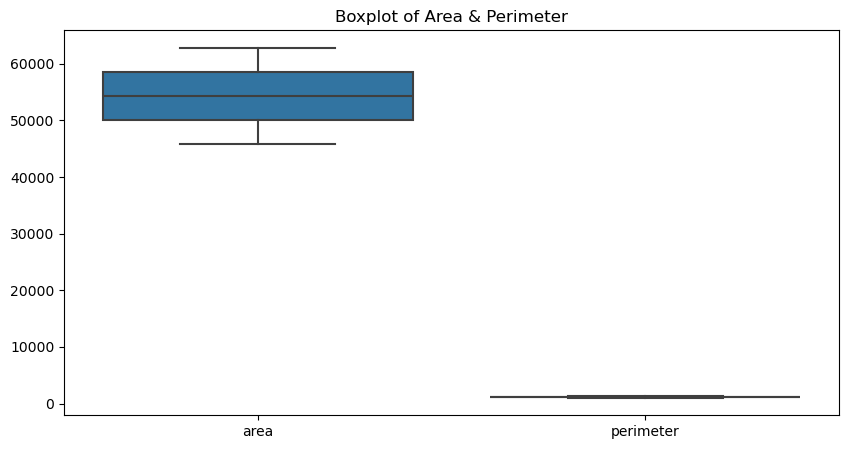

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=gdf[["area", "perimeter"]])
plt.title("Boxplot of Area & Perimeter")
plt.show()

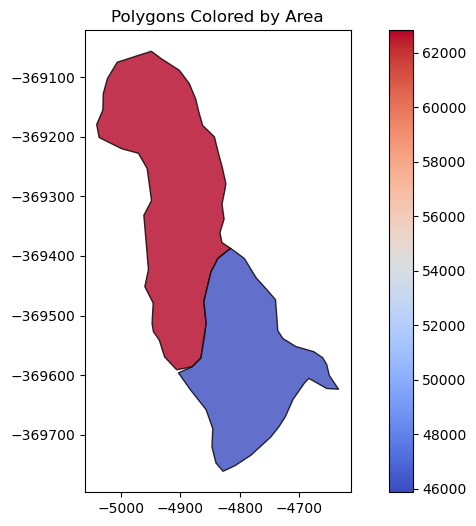

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(column="area", cmap="coolwarm", legend=True, edgecolor="black", alpha=0.8, ax=ax)
plt.title("Polygons Colored by Area")
plt.show()

In [7]:
m = folium.Map(location=[gdf.centroid.y.mean(), gdf.centroid.x.mean()], zoom_start=10)

for _, row in gdf.iterrows():
    folium.GeoJson(row.geometry).add_to(m)

m.save("polygon_map.html")